# Linear Regression

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Ignoring the warnings
import warnings as wr
wr.filterwarnings('ignore')

In [62]:
#Importing the Dataset
df1 = pd.read_csv("Rent.csv", sep=';')

In [63]:
df1.head(3) #Displaying the top rows of the dataset

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [5]:
df1.shape #Number of rows and columns of the dataset

(60, 2)

In [6]:
df1.tail(3) #The end rows from the dataset

,area,rent
57,1800,25100
58,2200,31560
59,3100,51600


In [7]:
df1[15:19] #Displaying Specific number of rows

,area,rent
15,3100,51500
16,1800,30500
17,1550,21000
18,1800,25000


Text(0.5, 1.0, 'House Rent Price in Dhaka')

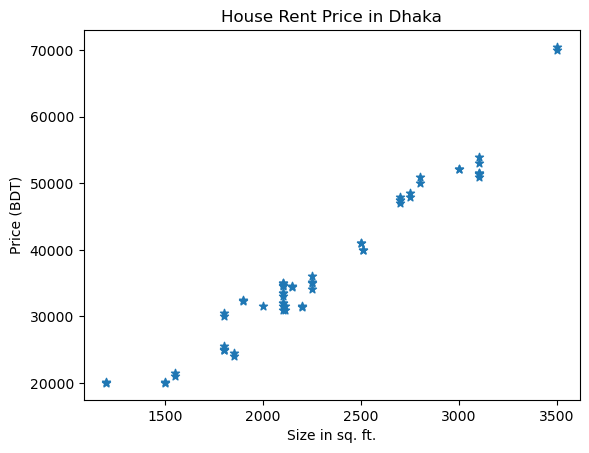

In [8]:
plt.scatter(df1.area, df1.rent, marker="*")
plt.xlabel("Size in sq. ft.")
plt.ylabel("Price (BDT)")
plt.title("House Rent Price in Dhaka")

In [9]:
df1.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [10]:
x= df1.drop('rent', axis=1) #Droping the column named rent
#axis 1 refers to column and 0 is row

In [11]:
y = df1[['rent']]

In [12]:
y.head(2)

,rent
0,31500
1,35000


In [13]:
x.head(2)

,area
0,2000
1,2100


### Split dataset into two parts: 'Training' & 'Testing'

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
x_train, x_test, y_train, y_test = tts(x,y, test_size=0.33, random_state=1)

In [16]:
x_train.head(2)

,area
42,2100
56,2750


In [17]:
x_test.head(2)

,area
39,2100
41,2100


In [18]:
y_train.head(2)

,rent
42,34700
56,48500


In [19]:
y_test.head(2)

,rent
39,31500
41,32020


### Applying Linear Regression

In [20]:
#Import Linear Regression from Sklearn
from sklearn.linear_model import LinearRegression

In [21]:
#ECreating the object of Linear Regression model
reg = LinearRegression() 

In [22]:
#Fitting the data into the model/ Training the Model
reg.fit(x_train, y_train)

LinearRegression()

In [23]:
#Predicting the rent of house for a 2000 sq. ft. house
reg.predict([[2000]])

array([[30927.80436869]])

In [24]:
#Creating a new column with all predicted values
df1["Predicted_rent"] = reg.predict(df1[['area']])

In [25]:
df1.head()

,area,rent,Predicted_rent
0,2000,31500,30927.804369
1,2100,35000,33028.081883
2,2500,41050,41429.191942
3,2250,36100,36178.498155
4,3000,52100,51930.579516


# Best Fit Line

Text(0.5, 1.0, 'House Rent Price in Dhaka')

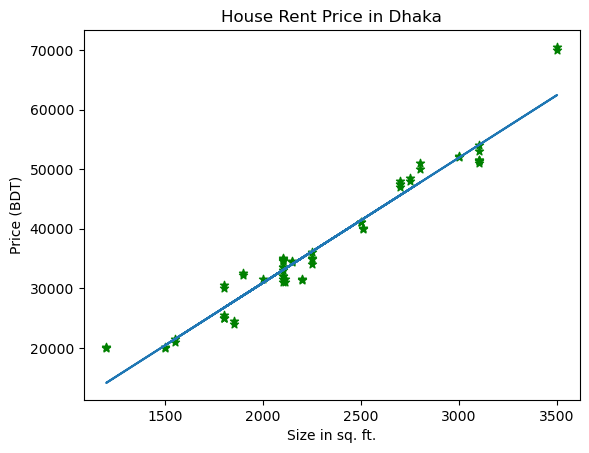

In [26]:
#Showing the actual datapoints of the dataset
plt.scatter(df1.area, df1.rent, marker= '*', color='Green')
#Showing the predicted values with respect to the testing data
plt.plot(x_test, reg.predict(x_test))

plt.xlabel("Size in sq. ft.")
plt.ylabel("Price (BDT)")
plt.title("House Rent Price in Dhaka")

Text(0.5, 1.0, 'House Rent Price in Dhaka')

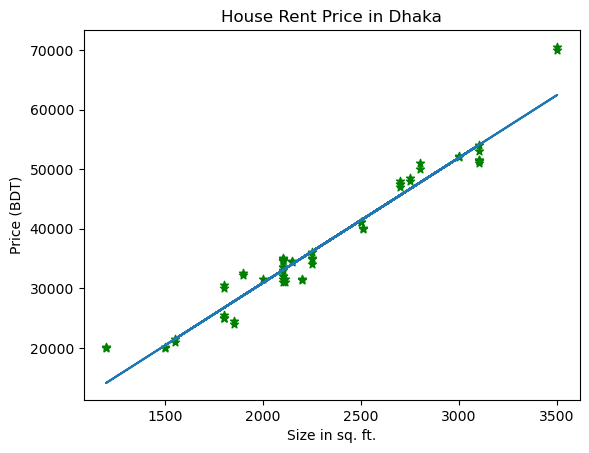

In [27]:
#Showing the actual datapoints of the dataset
plt.scatter(df1.area, df1.rent, marker= '*', color='Green')
#Showing the predicted values with respect to the testing data
plt.plot(x_train, reg.predict(x_train))

plt.xlabel("Size in sq. ft.")
plt.ylabel("Price (BDT)")
plt.title("House Rent Price in Dhaka")

# MAE & MSE for our Model

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
#MSE for testing data
test_mse = mean_squared_error(y_test, reg.predict(x_test))
#Here, y_test is the actual output/data of the dataset
#And, reg.predict(x_test)'s output is the predicted data/output'
#So, we can compare the predicted data with the actual data
test_mse

7421807.705906522

In [30]:
#Similarly MSE for training data
train_mse = mean_squared_error(y_train, reg.predict(x_train))
train_mse

6602823.624588491

In [31]:
#Similarly MAE for testing data
test_mae = mean_absolute_error(y_test, reg.predict(x_test))
test_mae

1881.6683699430062

In [32]:
#Similarly MAE for training data
train_mae = mean_absolute_error(y_train, reg.predict(x_train))
train_mae

2034.6296483710926